# Avaliação Final dos Modelos (Conjunto de Teste)

Este notebook realiza a avaliação final dos modelos treinados,
usando apenas os dados de teste, com objetivo de medir a capacidade de
generalização e selecionar o modelo final para deploy.


## Imports

In [36]:
import pandas as pd
import joblib
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

from src import visual as vs, train 

#Carregar dataset

In [37]:
data_path = "../data/processed/test.csv"  
TARGET_COL = "Depression"  

df, X, y = train.load_data(data_path, target_col=TARGET_COL)
df.head()

print("Shape de X:", X.shape)
print("Distribuição da variável alvo:")
y.value_counts(normalize=True)

Shape de X: (5572, 11)
Distribuição da variável alvo:


Depression
1    0.585786
0    0.414214
Name: proportion, dtype: float64

## Carregando Modelos

In [38]:
models = {
    "SVM": joblib.load("../models/svm_1.joblib"),
    "KNN": joblib.load("../models/knn_1.joblib"),
    "MLP": joblib.load("../models/mlp_1.joblib")
}


Avaliação das métricas no teste

In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
results_dict = {}

for name, model in models.items():
    proba = model.predict_proba(X)[:, 1]
    pred = (proba >= 0.5).astype(int)

    results_dict[name] = {
    "accuracy": accuracy_score(y, pred),
    "precision": precision_score(y, pred, zero_division=0),
    "recall": recall_score(y, pred, zero_division=0),
    "f1": f1_score(y, pred, zero_division=0)
}



#Comparação Gráfica

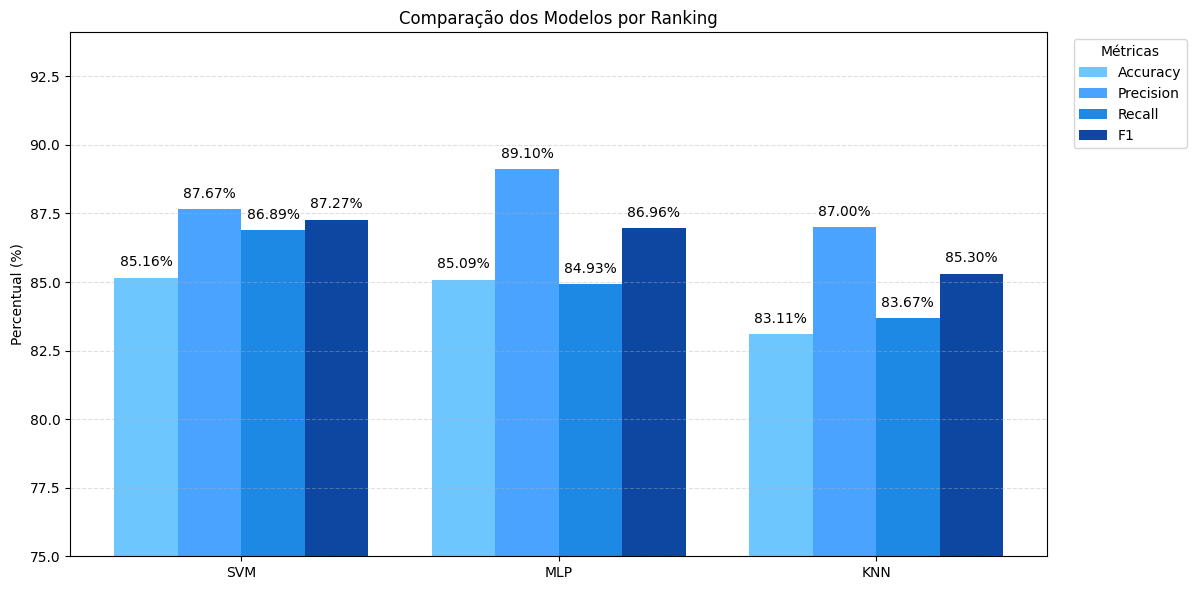

In [40]:
vs.plot_model_comparison(results_dict)


##Matriz de Confusão

SVM
KNN
MLP


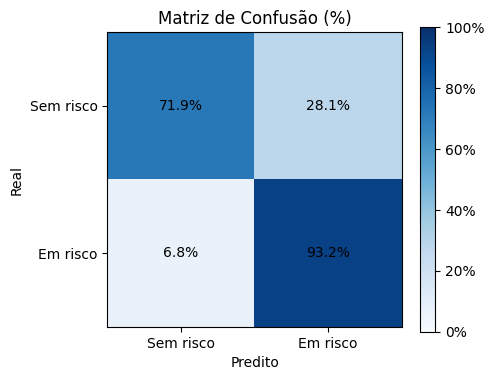

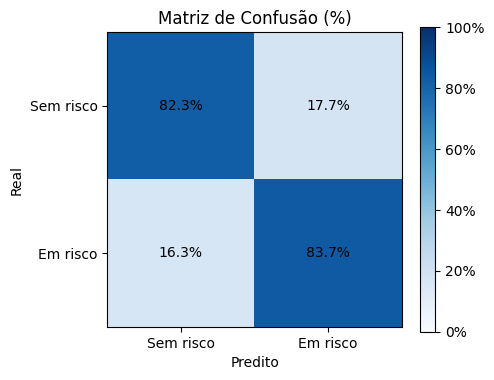

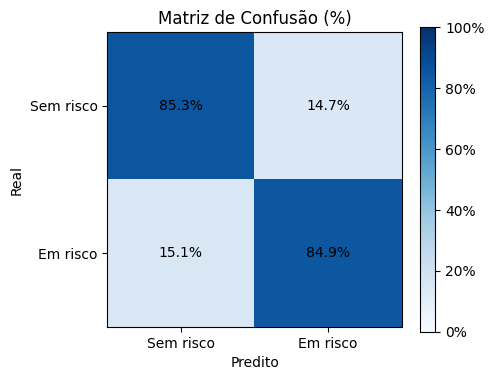

In [41]:
for name, model in models.items():
    pred = model.predict(X)
    print(f"{name}")
    vs.plot_confusion_matrix(y, pred, labels=["Sem risco", "Em risco"])


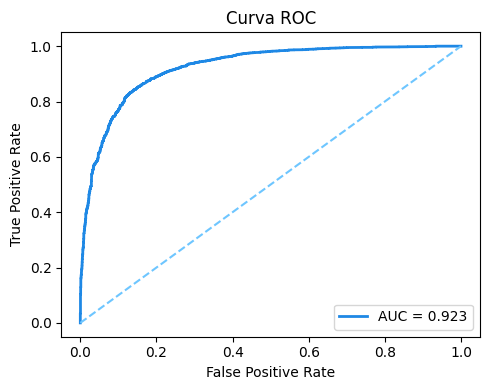

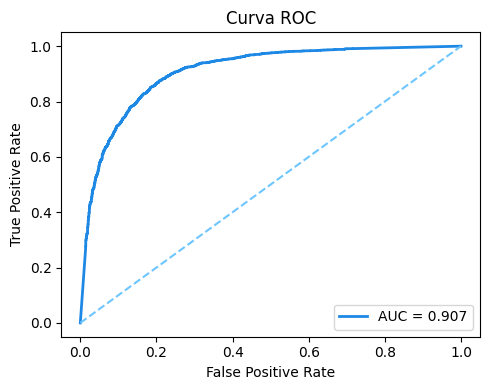

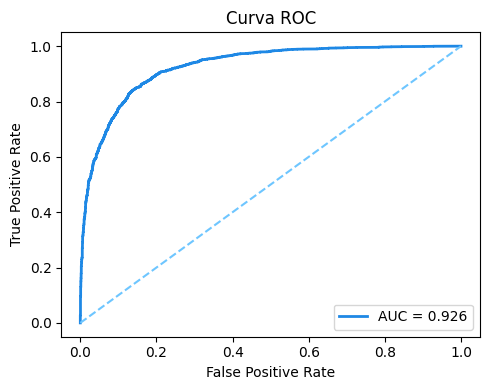

In [42]:
for name, model in models.items():
    proba = model.predict_proba(X)[:, 1]
    vs.plot_roc_curve(y, proba)
    
